# Wrangling Data Project - Udacity 2021

Project by Victor Pham

Date: April 18, 2021

Data wrangling, which consists of:
- Gathering data 
- Assessing data
- Cleaning Data
- Storing, analyzing and visualizing your wrangled data.

Details about the project requirements and analysis can be reviewed in the coupled "Wraggle Report" and "Act Report"

# Table of Contents

1.0 [Gathering Data](#gather) <br>
&emsp;1.1 [Twitter API](#twitter) <br>
2.0 [Assessing Date for this Project](#assess) <br>
&emsp;2.1 [Quality Issues](#quality) <br>
&emsp;2.2 [Tidiness Issues](#tidiness) <br>
3.0 [Data Cleaning](#clean) <br>
4.0 [Analysis](#analysis)


## <u> 1.0 Gathering Data </u>
<a id = "gather"> </a>

In [1]:
import pandas as pd
import wptools
import os
import requests

from timeit import default_timer as timer
import json

from PIL import Image
from io import BytesIO

In [2]:
df_twitter = pd.read_csv("twitter-archive-enhanced.csv")


In [3]:
df_twitter.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2291,667165590075940865,NaN,NaN,2015-11-19 02:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667165590...,10,10,Churlie,None,None,None,None


## The Three Datasets to Gather ##
Use the request from the url provided to grab the images?

1) Using requests and the url to obtain the "image-predictions.tsv" file
  - Import this file using pd.read_csv

2) Use the twitter API to grab the specific tweets, using the same tweet_id from "twitter_archive_enhanced.csv" to grab extra info from each twitter page directly, this will help us flesh out the data. The API is then used to grab each Twitter ID into a JSON file format. From there we can query (json.loads) the specific information we need using text extraction. It is important our encoding is in UTF-8 and write = 'r'  

3) We now have three of our databases and we can start the Assessing Data for this project:

    - Image Predictions File
    - Twitter_Archive_Enhanced.csv
    - Twitter API file


### Obtaining the Twitter Photos File 

In [4]:
folder_name = 'twitter_photos'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
#for url in image_prediction_url:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,
                    url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
image_predictions.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1994,874057562936811520,https://pbs.twimg.com/media/DCFGtdoXkAEsqIw.jpg,1,flat-coated_retriever,0.832177,True,black-and-tan_coonhound,0.040437,True,Newfoundland,0.028228,True


###  1.1 Twitter API
<a id = "twitter"> </a>

As reference the Twitter API code was included as if it was run, however as per the project requirements, the consumer_key, consumer_secret, access_token and access_secret were not included. The following code was not run, as it needs the proper keys to run properly. This creates a "tweet_json.txt" file from the twitter API which will be parsed for the specific information.

## This is grabbing the twitter API using the keys from the twitter development page once a project has beenr requested

import tweepy

consumer_key = '60lmCL7Jtk5ZtvdkBOvlqGBCx'
consumer_secret = 'MYsUAef7MqQf8pAMOPh3agWu0qtEPI656iZdgyTXqMyPUWqKlc'
access_token = '18559826-EFH4poaJOnREZLa9tRvYlqwUOBRRvGbWr2Use4q2H'
access_secret = '8DhXagwJDbCLJq1JDuOpmvzTxPMH321AL6YjzkRqG3ZkM'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

api.me()

#### The point of this code is to use the twitter_id and the twitter API to grab the text data from each of the twitter pages.
#### This is possible as each twitter page uses the twitter_id to parse each page.
#### We can use api.get_status and the tweet_id to dump the content into a json file (outfile)

from timeit import default_timer as timer
import json

tweet_ids = df_twitter.tweet_id.values
len(tweet_ids)

#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    ### This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### Gathering Data for this Project

Project Details: Then read this tweet_json.txt file line by line into a pandas Datafram with (at minimum) tweet ID, retweet count and favorite count

In the code below it should be noted we are using "json.loads" instead of "json.load". This is because the variable tweet is a str and not a file


From the official documentation https://docs.python.org/3/library/json.html:
json.load - Deserialize fp (a .read()-supporting text file or binary file containing a JSON document) to a Python object using this conversion table.

json.loads - Deserialize s (a str, bytes or bytearray instance containing a JSON document) to a Python object using this conversion table.

In [9]:
#Using the tweet_json.txt file, extract the intended data into a new dataframe, in this case we will be 
# extracting the retweet_count, favorite_count and the tweet_id.
# Refer to this link for terminology on using json.loads - https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
# 
df_list = []
with open('tweet_json.txt', encoding='utf-8', mode='r') as file:
    for tweet in file:
        data = json.loads(tweet)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_list.append({'tweet_id': int(tweet_id),
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)})
twitter_json = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [10]:
twitter_json.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7323,34902
1,892177421306343426,5468,30227
2,891815181378084864,3616,22753
3,891689557279858688,7516,38174
4,891327558926688256,8074,36444


# <u> 2.0 Assessing Data for this Project <u> 
  <a id = "assess"> </a>

The three databases are twitter_json, df_twitter and images_predictions.

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

## 2.1 Quality Issues ##
<a id = "quality"> </a>

1.	Tweet IDs need to be converted into strings, to not be consider in numerical analysis for all three databases.

2.	The “timestamp” column should be converted into a datetime format in case this column needs to be analyzed.

3.	Remove any entries in the tweet archive that were either retweeted by using the “retweeted_status_id”, otherwise they will be treated as duplicated IDs.

4. Remove any entries in the tweet archive that were replied using the "in_reply_to_status_id" to identify these ones, otherwise they will be treated as duplicated IDs.

4.	Remove the “retweeted_status_id” and “in_reply_to_status_id” columns.

5.	Some of the tweets do not have proper dog names, the string parsing, grabbed names as “None”, “a”, “an” and “the.”. Essentially any lowercase names should be removed and replaced by NaN.

6.	Tweet ID 666287406224695000 has a rating of “1/2” which was mis-interpreted from the tweet, it should instead be 9/10.

7.	The dog types labelled as None were converted as a blank string ‘’ to help in combining them later in one of the tidiness steps.



## 2.2 Tidiness Issues ##
<a id = "tidiness"> </a>

1. The type of dog (doggo, floofer, pupper, puppo) can be placed under one column as this type of variable is describe the type of dog, it does not need to be in four different columns. Each variable forms a column.

2. Since we are not keeping tweets without images, we can combined the enhanced twitter archive tables with the image predictions table using the tweet_id. We can probably also combine the JSON table for the tweets that had the dog breed prediction performed on the specific tweets

In [11]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1594,686377065986265092,NaN,NaN,2016-01-11 02:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Birf. He thinks he's gone blind. 10/10 ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686377065...,10,10,Birf,None,None,pupper,None
2104,670668383499735048,NaN,NaN,2015-11-28 18:19:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a magical dog. Only appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670668383...,10,10,Phineas,None,None,None,None
509,812466873996607488,NaN,NaN,2016-12-24 01:16:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mary. She's desperately trying to recr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812466873...,12,10,Mary,None,None,None,None
426,821407182352777218,NaN,NaN,2017-01-17 17:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sundance. He's a doggo drummer. Even s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821407182...,14,10,Sundance,doggo,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None


In [13]:
df_twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [14]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
#tweet_id is int64
#78 reply tweets to be removed
#retweeted_status approximately 181 should be removed.
#Any tweets with missing expanded_urls shold be removed.

df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df_twitter.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Tonks        1
light        1
Edgar        1
Champ        1
Mo           1
Name: name, Length: 957, dtype: int64

In [18]:
#No duplicated Tweet IDs
df_twitter[df_twitter.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [19]:
df_twitter.tweet_id.isnull().sum()

0

In [20]:
df_twitter.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [21]:
twitter_json.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7323,34902
1,892177421306343426,5468,30227
2,891815181378084864,3616,22753
3,891689557279858688,7516,38174
4,891327558926688256,8074,36444


In [22]:
#tweet_id should be turned into a string
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        877 non-null    int64
 1   retweet_count   877 non-null    int64
 2   favorite_count  877 non-null    int64
dtypes: int64(3)
memory usage: 20.7 KB


In [23]:
twitter_json.describe()

,tweet_id,retweet_count,favorite_count
count,8.770000e+02,877.000000,877.000000
mean,8.200861e+17,4524.550741,13383.279361
std,3.693118e+16,5097.210015,14060.217488
min,7.588287e+17,1.000000,0.000000
25%,7.895309e+17,1883.000000,5045.000000
50%,8.185365e+17,3100.000000,10221.000000
75%,8.482137e+17,5326.000000,18820.000000
max,8.924206e+17,53919.000000,128322.000000


In [24]:
twitter_json.duplicated().sum()

0

In [25]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
871,697943111201378304,https://pbs.twimg.com/media/Ca-XjfiUsAAUa8f.jpg,1,Great_Dane,0.126924,True,Greater_Swiss_Mountain_dog,0.110037,True,German_short-haired_pointer,0.090816,True
1057,714631576617938945,https://pbs.twimg.com/media/CerhoBWWAAA5eLL.jpg,1,meerkat,0.143497,False,weasel,0.117402,False,black-footed_ferret,0.099933,False
415,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,Pembroke,0.742320,True,Cardigan,0.084937,True,Eskimo_dog,0.068321,True
566,678334497360859136,https://pbs.twimg.com/media/CWntoDVWcAEl3NB.jpg,1,Norfolk_terrier,0.378643,True,golden_retriever,0.095594,True,kelpie,0.085309,True
1625,803773340896923648,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,miniature_pinscher,0.817066,True,redbone,0.059707,True,Irish_terrier,0.034195,True


In [27]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
nail                    1
crash_helmet            1
electric_fan            1
clumber                 1
robin                   1
Name: p1, Length: 378, dtype: int64

In [28]:
image_predictions.duplicated().sum()

0

In [29]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
#tweet_id should be changed into a string

image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


# <u> 3.0 Data Cleaning </u> #
<a id = "clean"> </a>

Each step described in the `Assess` section should be defined, coded and tested for data cleaning


In [32]:
#A copy was made of the original df in case of any errors were made
df_twitter_test = df_twitter.copy()
image_predictions_test = image_predictions.copy()
twitter_json_test = twitter_json.copy()

### (1) Define - Tweet IDs to be converted into Strings

The tweet IDs for all three databases should be converted to string.

#### Code

In [33]:
df_twitter_test.tweet_id = df_twitter.tweet_id.astype(str)
image_predictions_test.tweet_id = image_predictions.tweet_id.astype(str)
twitter_json_test.tweet_id = twitter_json.tweet_id.astype(str)

#### Test

In [34]:
df_twitter.tweet_id.dtypes
image_predictions.tweet_id.dtypes

dtype('int64')

### (2) Define - Convert timestamp

Convert the timestamp into the datetime format, for easier analysis of that type of data

#### Code

In [35]:
df_twitter_test.timestamp =  pd.to_datetime(df_twitter.timestamp)

#### Test

In [36]:
df_twitter_test.timestamp.dtype

datetime64[ns, UTC]

#### (3)/(4)/(5) Define - Remove any tweets using the "retweeted_status_id"  and "in_reply_to_status_id". These columns will also need to be removed

 Remove any of the tweets that were retweeted using the "retweeted_status_id"  or replies using the in_reply_to_status_id. These columns will then be removed these columns from the dataframe.

#### Code

In [37]:
df_twitter_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [38]:
df_twitter_test = df_twitter_test[df_twitter_test['retweeted_status_id'].isnull()]
df_twitter_test = df_twitter_test[df_twitter_test['in_reply_to_status_id'].isnull()]

In [39]:
#Drop these columns after removing the specified entries from our list
df_twitter_test.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1, inplace = True)

#### Test

In [40]:
df_twitter_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### (6) Define - Some of the tweets do not have dog names - Any lowercase name will be replaced by NaN

Some of the tweet names were not parsed correctly, and as such are strings of "a", "the" or "an". These value strings for the purposes of analysis using dog names, should be converted into NaN. From some quick review of the names, some of the names were mis-identified from the string "This is 'NAME'" which would sometimes come up as "This is a..." or "This is an...". As such many of the names are lowercase "a" and "an" which should be removed, as well as none to null values so they are not misconstrued in the analysis using the "Name" column.

To update this programatically, any lowercase name will be replaced by NaN.

#### Code

In [41]:
import numpy as np

In [42]:
#Converts all lowercase names (non applicable ones) to NaN values
mask = df_twitter_test.name.str.islower()
column_name = 'name'
df_twitter_test.loc[mask, column_name] = np.nan

dfm_twitter_test.loc[df_twitter_test.dog_type == 'doggopuppo'] = 'doggo, pupper'

In [43]:
df_twitter_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1993 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### Test

In [44]:
df_twitter_test.name.value_counts()

None         603
Lucy          11
Charlie       11
Oliver        10
Cooper        10
            ... 
Snickers       1
Schnitzel      1
Clybe          1
Fabio          1
Mo             1
Name: name, Length: 930, dtype: int64

### (7) Define -Tweet ID 666287406224695000 has a rating of 1/2, which was mis-interpreted from the tweet, it should instead be 9/10.

Tweet ID 666287406224695000 has a rating of 1/2, which was mis-interpreted from the tweet, it should instead be 9/10.

#### Code

In [45]:
df_twitter_test.query('rating_numerator == 1')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1869,675153376133427200,2015-12-11 03:21:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
2091,670783437142401025,2015-11-29 01:56:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2261,667549055577362432,2015-11-20 03:44:31+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,NaN,None,None,None,None
2338,666104133288665088,2015-11-16 04:02:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


In [46]:
df_twitter_test.loc[2335]

tweet_id                                             666287406224695296
timestamp                                     2015-11-16 16:11:11+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is an Albanian 3 1/2 legged  Episcopalian...
expanded_urls         https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                      1
rating_denominator                                                    2
name                                                                NaN
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 2335, dtype: object

In [47]:
df_twitter_test.loc[2335, 'rating_numerator']= 9
df_twitter_test.loc[2335, 'rating_denominator'] = 10

#### Test

In [48]:
df_twitter_test.loc[2335]

tweet_id                                             666287406224695296
timestamp                                     2015-11-16 16:11:11+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  This is an Albanian 3 1/2 legged  Episcopalian...
expanded_urls         https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                      9
rating_denominator                                                   10
name                                                                NaN
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 2335, dtype: object

## Tidiness ##

Two tidiness issues identified:

<ul> 1) The dog types are separated in four different columns, when they can be under one column called: Dog Types </ul>
<ul> 2) Since we are not keeping tweets without images, we can combined the enhanced twitter archive tables with the image predictions table using the tweet_id, aswell as the JSON table.

### (1) Define - Combine JSON table and Images Predictions Table

The JSON and Image Predictions table can be combined using the pandas merge function (pd.merge, using an inner left join). We want to combine the image_predictions and twitter_json into the df_twitter_test database.

#### Code

In [49]:
df_twitter_test = pd.merge(df_twitter_test, image_predictions_test, on = 'tweet_id', how = 'left')

In [50]:
df_twitter_test.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1629,675145476954566656,2015-12-11 02:49:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,https://twitter.com/dog_rates/status/675145476...,9,10,None,None,None,...,1.0,Labrador_retriever,0.458746,True,Great_Dane,0.235504,True,Staffordshire_bullterrier,0.116864,True
22,887473957103951883,2017-07-19 00:47:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,...,2.0,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
1882,670061506722140161,2015-11-27 02:08:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Liam. He has a particular set of skill...,https://twitter.com/dog_rates/status/670061506...,11,10,Liam,None,None,...,1.0,Italian_greyhound,0.329339,True,American_Staffordshire_terrier,0.305294,True,whippet,0.111686,True
15,889278841981685760,2017-07-24 00:19:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,None,None,...,1.0,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
629,770787852854652928,2016-08-31 00:58:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His tongue has gone rogue. Do...,https://twitter.com/dog_rates/status/770787852...,10,10,Winston,None,None,...,1.0,Bernese_mountain_dog,0.787812,True,Greater_Swiss_Mountain_dog,0.163946,True,EntleBucher,0.020293,True


In [51]:
df_twitter_test = pd.merge(df_twitter_test, twitter_json_test, on = 'tweet_id', how = 'left')

#### Test

In [52]:
df_twitter_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1993 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
 12  jpg_url             1971 non-null 

### (2) Define - Dog types are separated in four different columns

All of the dog types are currently in four different columnes. Each of these columns can be in one combined column called "Dog Types". Each "None" string will be convereted into an empty string using the pandas replace function to combine the various columns more easily.

#### Code

In [53]:
df_twitter_test.doggo.replace("None", '', inplace = True)
df_twitter_test.floofer.replace("None", '', inplace = True)
df_twitter_test.pupper.replace("None", '', inplace = True)
df_twitter_test.puppo.replace("None", '', inplace = True)

In [54]:
df_twitter_test.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1018,712668654853337088,2016-03-23 15:53:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sunny and Roxy. They pull things ...,https://twitter.com/dog_rates/status/712668654...,10,10,Sunny,,,...,0.829058,True,golden_retriever,0.038664,True,Chihuahua,0.026221,True,NaN,NaN
1651,674670581682434048,2015-12-09 19:22:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jeb &amp; Bush. Jeb is somehow stuck in t...,https://twitter.com/dog_rates/status/674670581...,9,10,Jeb,,,...,0.180079,True,Eskimo_dog,0.178033,True,Siberian_husky,0.077966,True,NaN,NaN
1168,700143752053182464,2016-02-18 02:24:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When it's Janet from accounting's birthday but...,https://twitter.com/dog_rates/status/700143752...,10,10,None,,,...,0.532460,True,crossword_puzzle,0.103796,False,binder,0.100371,False,NaN,NaN
239,836380477523124226,2017-02-28 01:00:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She just blasted off. Streamline ...,https://twitter.com/dog_rates/status/836380477...,12,10,Ava,,,...,0.082489,False,sliding_door,0.061017,False,grand_piano,0.055086,False,2864.0,14332.0
1165,700462010979500032,2016-02-18 23:28:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Murphy. He's a mini golden retriever. ...,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,,,...,0.678651,False,Pomeranian,0.110268,True,Angora,0.104139,False,NaN,NaN


In [55]:
df_twitter_test.iloc[434]

tweet_id                                             803638050916102144
timestamp                                     2016-11-29 16:33:36+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  Pupper hath acquire enemy. 13/10 https://t.co/...
expanded_urls         https://twitter.com/dog_rates/status/803638050...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
doggo                                                                  
floofer                                                                
pupper                                                           pupper
puppo                                                                  
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/80363...
img_num                                                         

In [56]:
df_twitter_test['dog_type'] = df_twitter_test['doggo'] + df_twitter_test['floofer'] + df_twitter_test['pupper'] + df_twitter_test['puppo']

In [57]:
df_twitter_test.doggo.value_counts()

         2014
doggo      83
Name: doggo, dtype: int64

In [58]:
df_twitter_test.floofer.value_counts()

           2087
floofer      10
Name: floofer, dtype: int64

In [59]:
df_twitter_test.pupper.value_counts()

          1867
pupper     230
Name: pupper, dtype: int64

In [60]:
df_twitter_test.puppo.value_counts()

         2073
puppo      24
Name: puppo, dtype: int64

In [61]:
df_twitter_test.dog_type.value_counts()

                1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_type, dtype: int64

In [62]:
# Convert doggopupper, doggofloofer and doggopuppo to the proper names
df_twitter_test.loc[df_twitter_test.dog_type == 'doggopupper', 'dog_type'] = 'doggo, pupper'
df_twitter_test.loc[df_twitter_test.dog_type == 'doggofloofer', 'dog_type'] = 'doggo, floofer'
df_twitter_test.loc[df_twitter_test.dog_type == 'doggopuppo', 'dog_type'] = 'doggo, puppo'

In [63]:
df_twitter_test.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

#### Test

In [64]:
df_twitter_test.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type
472,795464331001561088,2016-11-07 03:14:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,13,10,None,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1.0,...,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,0.124684,True,22975.0,48607.0,doggo
2041,667062181243039745,2015-11-18 19:29:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Keet. He is a Floridian Amukamara. Abs...,https://twitter.com/dog_rates/status/667062181...,10,10,Keet,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,1.0,...,True,vizsla,0.090998,True,kelpie,0.022956,True,NaN,NaN,
1282,691321916024623104,2016-01-24 18:09:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Molly. She's a Peruvian Niddlewog. Lov...,https://twitter.com/dog_rates/status/691321916...,11,10,Molly,https://pbs.twimg.com/media/CZgRmk0UcAAxeuQ.jpg,1.0,...,True,German_shepherd,0.207897,True,kelpie,0.094353,True,NaN,NaN,
15,889278841981685760,2017-07-24 00:19:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13,10,Oliver,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1.0,...,True,borzoi,0.194742,True,Saluki,0.027351,True,4628.0,22810.0,
1459,681231109724700672,2015-12-27 21:52:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I just love this pic. 11/10 this pupper is goi...,https://twitter.com/dog_rates/status/681231109...,11,10,None,https://pbs.twimg.com/media/CXQ4EwQWwAEVaUf.jpg,1.0,...,True,cocker_spaniel,0.345646,True,Airedale,0.147912,True,NaN,NaN,pupper


## Final Master Twitter_Archive_Master.csv File ##

The final cleaned file was converetd into a csv file called 'twitter_archive_master.csv'.

In [65]:
#Convert the dataframe into a final csv file called "twitter_archive_master.csv"
df_twitter_test.to_csv('twitter_archive_master.csv', index = False)  

In [66]:
df_twitter_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1993 non-null   object             
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   float64            
 10  p1                  1971 non-null   object             
 11  p1_conf             1971 non-null   float64            
 12  p1_dog              1971 non-null 

# <u> 4.0 Analysis </u>
<a id = "analysis"> </a>

The following code is performing analysis on the WeRateDogs database and some of the data presented:

<ul> 1) Dog Types </ul> 
<ul> 2) Common Dog Breeds </ul>
<ul> 3) Common Dog Names </ul>
<ul> 4) Analysis of the Numerator </ul>
<ul> 5) Retweet Count and Favorite Count </ul>

The explanation of each analysis and some of visualizations can be found in the separate "Act Report" PDF file.


In [67]:
import matplotlib.pyplot as plt

In [68]:
df_twitter_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1993 non-null   object             
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   float64            
 10  p1                  1971 non-null   object             
 11  p1_conf             1971 non-null   float64            
 12  p1_dog              1971 non-null 

In [69]:
df_twitter_test.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2097.000000,2097.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,693.000000,693.000000
mean,12.193133,10.452551,1.201928,0.594558,1.345850e-01,6.016556e-02,4404.897547,16802.847042
std,40.364316,6.642505,0.559020,0.272126,1.010527e-01,5.094156e-02,4964.051876,13913.104826
min,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,146.000000,842.000000
25%,10.000000,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,1950.000000,8333.000000
50%,11.000000,10.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,3000.000000,12871.000000
75%,12.000000,10.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,4781.000000,20808.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,53919.000000,128322.000000


### 1) Dog Types

Analysis of the different dog type based on the "Dogtionary" types.

In [70]:
df_twitter_test.dog_type.value_counts()

                  1761
pupper             221
doggo               72
puppo               23
doggo, pupper        9
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_type, dtype: int64

Text(0.5, 0, 'Number of Dog Types')

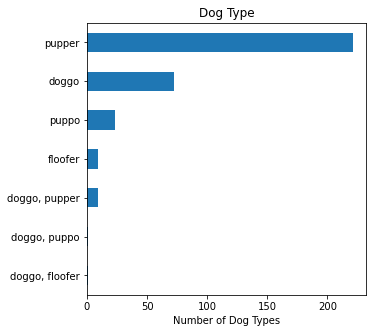

In [71]:
df_twitter_test.dog_type.value_counts().sort_values()[:-1].plot(kind = 'barh',figsize = (5,5));
plt.title('Dog Type')
plt.xlabel('Number of Dog Types')

### 2) Common Dog Breeds

Using the value counts from the p1 test, we can identify common dog breeds that were identified from the neural network. For simplicity only true matches from the P1 column were used to identify common dog breeds. A bar graph was used to plot the various types of dogs and to see the most common ones at the top.

In [72]:
df_twitter_test.p1.value_counts()

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
crane                   1
pedestal                1
rotisserie              1
earthstar               1
cash_machine            1
Name: p1, Length: 373, dtype: int64

In [73]:
#A query was used to only grab the true dog types.
p1_filter = df_twitter_test.query('p1_dog == True')
p1_filter.p1.value_counts()

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
clumber                 1
groenendael             1
standard_schnauzer      1
EntleBucher             1
silky_terrier           1
Name: p1, Length: 111, dtype: int64

Text(0, 0.5, 'Number of occurances')

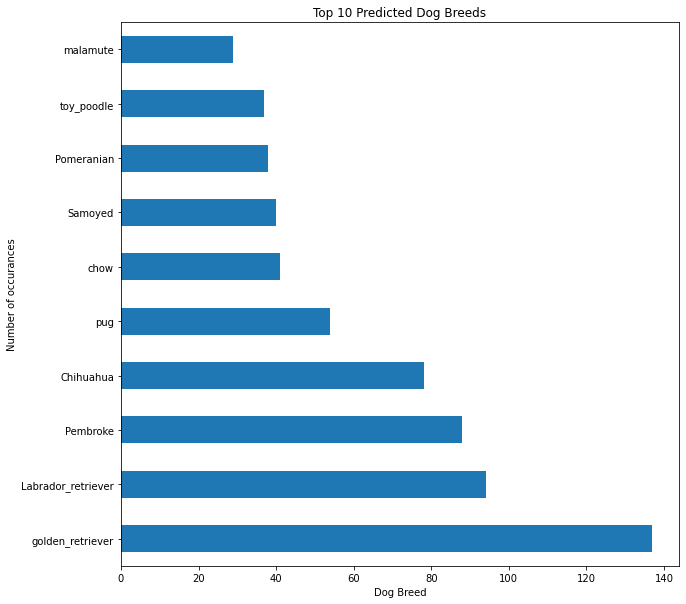

In [74]:
p1_filter.p1.value_counts().sort_values(ascending = False)[:10].plot(kind = 'barh',figsize = (10,10));
plt.title('Top 10 Predicted Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Number of occurances')

### 3) Common Dog Names

Check the common dog names using value_counts.

In [75]:
df_twitter_test.name.value_counts()

None         603
Lucy          11
Charlie       11
Oliver        10
Cooper        10
            ... 
Snickers       1
Schnitzel      1
Clybe          1
Fabio          1
Mo             1
Name: name, Length: 930, dtype: int64

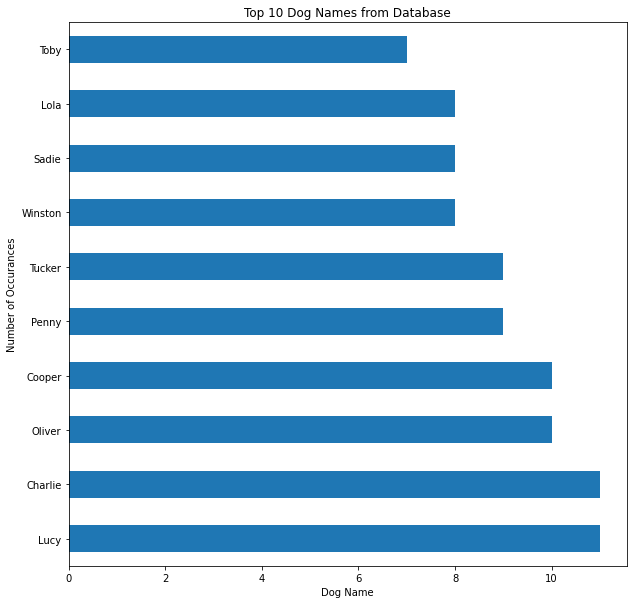

In [76]:
#This excludes None names
df_twitter_test.name.value_counts().sort_values(ascending = False)[1:11].plot(kind = 'barh',figsize = (10,10));
plt.title('Top 10 Dog Names from Database');
plt.xlabel('Dog Name');
plt.ylabel('Number of Occurances');

### 4) Analysis of the Numerator

Some analysis was done to understand the range and frequency of the un-orthodox numerator system used on the WeRateDog's twitter page.

In [77]:
df_twitter_test.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2097.000000,2097.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,693.000000,693.000000
mean,12.193133,10.452551,1.201928,0.594558,1.345850e-01,6.016556e-02,4404.897547,16802.847042
std,40.364316,6.642505,0.559020,0.272126,1.010527e-01,5.094156e-02,4964.051876,13913.104826
min,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,146.000000,842.000000
25%,10.000000,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,1950.000000,8333.000000
50%,11.000000,10.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,3000.000000,12871.000000
75%,12.000000,10.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,4781.000000,20808.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,53919.000000,128322.000000


Text(0, 0.5, 'Frequency of Numerator')

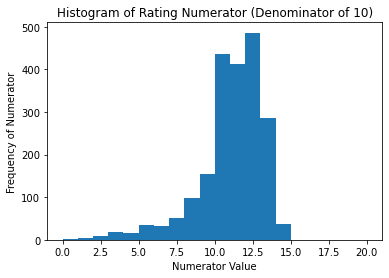

In [78]:
data = df_twitter_test['rating_numerator']
binwidth = 1
plt.hist(data, bins = range(min(data), 20 + binwidth, binwidth));
plt.title('Histogram of Rating Numerator (Denominator of 10)')
plt.xlabel('Numerator Value')
plt.ylabel('Frequency of Numerator')

In [79]:
df_twitter_test.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       154
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         4
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

### 5) Retweet Count and Favorite Count

Histograms and scatter plots were used to understand the correlation between retweet_count and favorite_count on WeRateDog's postings. df.describe() is used to get some statistical information from these numerical variables.

In [80]:
df_twitter_test.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2097.000000,2097.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,693.000000,693.000000
mean,12.193133,10.452551,1.201928,0.594558,1.345850e-01,6.016556e-02,4404.897547,16802.847042
std,40.364316,6.642505,0.559020,0.272126,1.010527e-01,5.094156e-02,4964.051876,13913.104826
min,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,146.000000,842.000000
25%,10.000000,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,1950.000000,8333.000000
50%,11.000000,10.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,3000.000000,12871.000000
75%,12.000000,10.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,4781.000000,20808.000000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,53919.000000,128322.000000


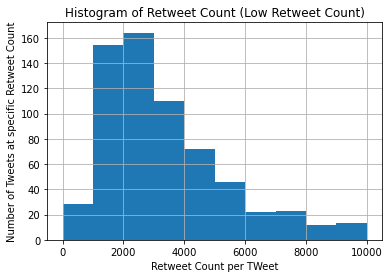

In [81]:
df_twitter_test['retweet_count'].hist(bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]);
plt.title('Histogram of Retweet Count (Low Retweet Count)')
plt.xlabel('Retweet Count per TWeet')
plt.ylabel('Number of Tweets at specific Retweet Count');

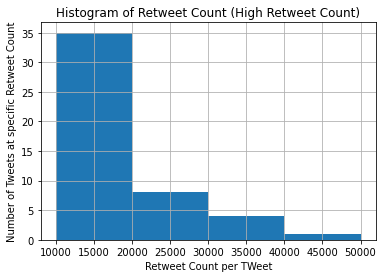

In [82]:
df_twitter_test['retweet_count'].hist(bins = [10000,20000,30000,40000,50000]);
plt.title('Histogram of Retweet Count (High Retweet Count)')
plt.xlabel('Retweet Count per TWeet')
plt.ylabel('Number of Tweets at specific Retweet Count');

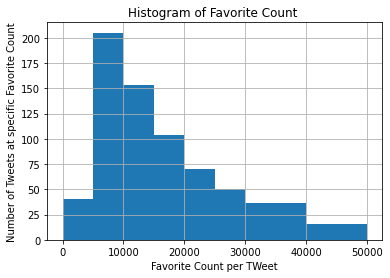

In [83]:
#Max retweet count
df_twitter_test['favorite_count'].hist(bins = [0,5000,10000,15000,20000,25000,30000,40000,50000]);
plt.title('Histogram of Favorite Count ')
plt.xlabel('Favorite Count per TWeet')
plt.ylabel('Number of Tweets at specific Favorite Count');

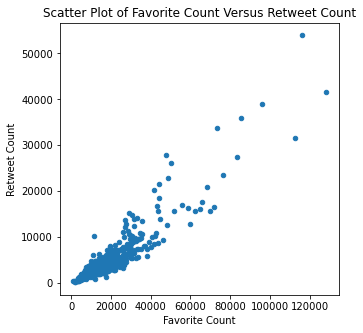

In [84]:
df_twitter_test.plot(x = 'favorite_count', y = 'retweet_count', kind = 'scatter', figsize =(5,5));
plt.title('Scatter Plot of Favorite Count Versus Retweet Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count');

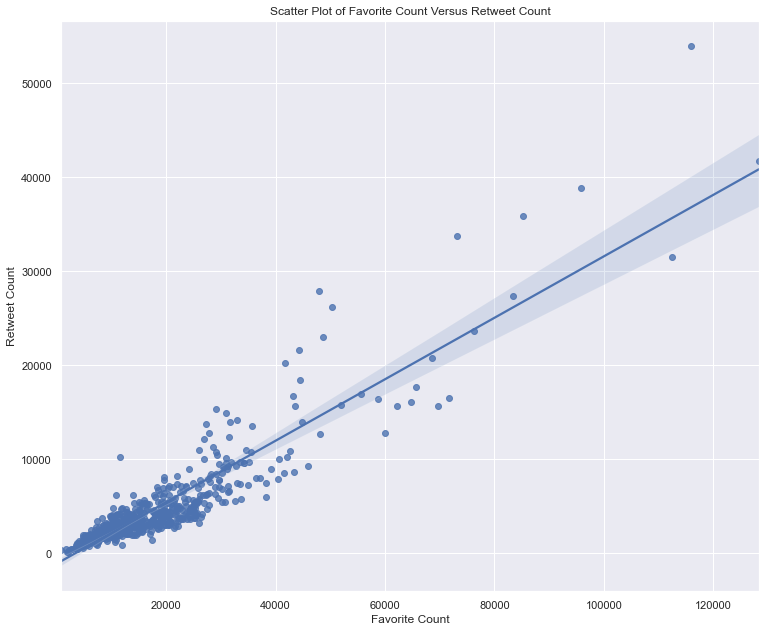

In [85]:
#Add Trendline
import seaborn as sns; sns.set_theme(color_codes = True)
ax = df_twitter_test
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
sns.regplot(x="favorite_count",
            y="retweet_count", 
            data= df_twitter_test);
plt.title('Scatter Plot of Favorite Count Versus Retweet Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count');